

---



* 원본 코드: [Basic regression: Predict fuel efficiency](https://www.tensorflow.org/tutorials/keras/regression)
* 수정자: 한양대ERICA, 산업경영공학과, 오요셉(yosepoh@hanyang.ac.kr)
* 마지막 수정일: 2023.04.01


---



# (1) Preliminaries

In [ ]:
# 데이터 시각화 패키지 Seaborn 설치
# -q는 리눅스 명령어로 설치 과정을 안보여줌
!pip install -q seaborn  

In [ ]:
# 데이터 전처리 패키지
import numpy as np
import pandas as pd

# 데이터 시각화 패키지
import matplotlib.pyplot as plt 
import seaborn as sns 

# 머신러닝 패키지
import tensorflow as tf 
from keras import layers 

print(tf.__version__)

2.12.0


# (2) Load the dataset 

In [ ]:
# 데이터셋 다운로드 및 데이터프레임에 저장
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight', 'Acceleration', 'Model Year', 'Origin']
raw_dataset = pd.read_csv(url, names=column_names, na_values='?', comment='\t', sep=' ',  skipinitialspace=True)

# 데이터 전처리
dataset = raw_dataset.copy()
dataset.isna().sum()
dataset = dataset.dropna()  

# 원-핫 인코딩(One-Hot Encoding)
dataset['Origin'] = dataset['Origin'].map({1: 'USA', 2: 'Europe', 3: 'Japan'})
dataset = pd.get_dummies(dataset, columns=['Origin'], prefix='', prefix_sep='')

dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
393,27.0,4,140.0,86.0,2790.0,15.6,82,0,0,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,1,0,0
395,32.0,4,135.0,84.0,2295.0,11.6,82,0,0,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,0,0,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,0,0,1


In [ ]:
# 데이터를 훈련 세트와 테스트 세트로 분할
train_dataset = dataset.sample(frac=0.8, random_state=0)
test_dataset = dataset.drop(train_dataset.index)

# 입력변수(X)와 출력변수(y) 구분
train_X = train_dataset.copy()
test_X = test_dataset.copy()
train_y = train_X.pop('MPG')
test_y = test_X.pop('MPG')

# 훈련 세트와 테스트 세트가 잘 분할되었는지 확인
print(len(train_X))
print(len(test_X))

314
78


# DNN과 단일 입력을 사용한 회귀

## (3) Build the model

In [ ]:
# DNN 모델과 최적화 방법을 정의하는 함수
def build_and_compile_model(norm):
  model = tf.keras.Sequential([
      norm,
      # 노드 갯수 64개로 하겠다 -> 하이퍼파라미터이므로 알아서 조정함
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(1)
  ])

  model.compile(loss='mean_absolute_error',
                # 경사하강법 Adam optimazer을 씀
                optimizer=tf.keras.optimizers.Adam(0.001))
  return model

In [ ]:
# 하나의 입력변수만 추출
horsepower = np.array(train_X['Horsepower'])

# 해당 입력변수에 대한 normalization layer 생성
input_layer_horsepower = layers.Normalization(input_shape=[1,], axis=None)
input_layer_horsepower.adapt(horsepower)  

# 정의된 함수를 호출하여 DNN모델 빌드
dnn_horsepower_model = build_and_compile_model(input_layer_horsepower)

# 모델 구조 확인
dnn_horsepower_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 1)                3         
 n)                                                              
                                                                 
 dense (Dense)               (None, 64)                128       
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4,356
Trainable params: 4,353
Non-trainable params: 3
_________________________________________________________________


- Trainable params가 w갯수임
- 노드 갯수(64개)는 결국 화살표 갯수임 때문에 화살표가 많아짐

## (4) Training

In [ ]:
%%time
# 100 epoch에 대한 훈련을 실행하고 진행 과정 기록
history = dnn_horsepower_model.fit(
    train_X['Horsepower'],
    train_y,
    epochs=100,  
    # train set안에서 train set과 validation set을 8대2로 나눔
    # validation은 training하는 과정에서 쓰임
    # 학습이 epoch의 어느시점에서 잘 학습되고 있나 확인하는 것임
    # 
    validation_split = 0.2)

Epoch 1/100
8/8 [==============================] - 1s 35ms/step - loss: 23.1784 - val_loss: 23.6056
Epoch 2/100
8/8 [==============================] - 0s 7ms/step - loss: 23.0151 - val_loss: 23.4459
Epoch 3/100
8/8 [==============================] - 0s 7ms/step - loss: 22.8654 - val_loss: 23.2812
Epoch 4/100
8/8 [==============================] - 0s 7ms/step - loss: 22.6997 - val_loss: 23.0722
Epoch 5/100
8/8 [==============================] - 0s 9ms/step - loss: 22.4717 - val_loss: 22.7929
Epoch 6/100
8/8 [==============================] - 0s 7ms/step - loss: 22.1705 - val_loss: 22.4234
Epoch 7/100
8/8 [==============================] - 0s 7ms/step - loss: 21.7742 - val_loss: 21.9460
Epoch 8/100
8/8 [==============================] - 0s 8ms/step - loss: 21.2654 - val_loss: 21.3336
Epoch 9/100
8/8 [==============================] - 0s 8ms/step - loss: 20.6055 - val_loss: 20.5546
Epoch 10/100
8/8 [==============================] - 0s 7ms/step - loss: 19.7785 - val_loss: 19.5712
Epoch 11

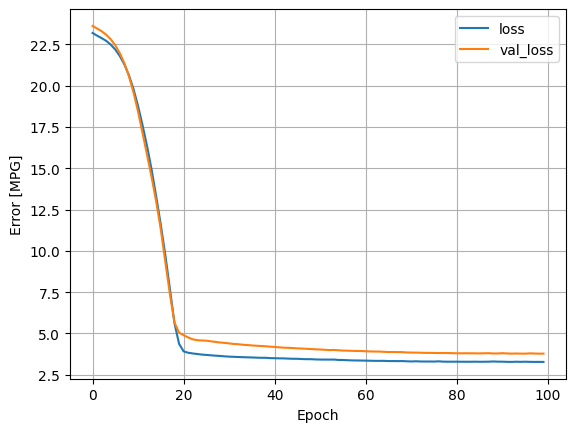

In [ ]:
# 훈련과정을 시각화하기 위한 함수 정의
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss') 
  plt.xlabel('Epoch')
  plt.ylabel('Error [MPG]')
  plt.legend()
  plt.grid(True)

# 훈련과정 시각화
plot_loss(history)

## (5) Evaluation

8/8 [==============================] - 0s 2ms/step


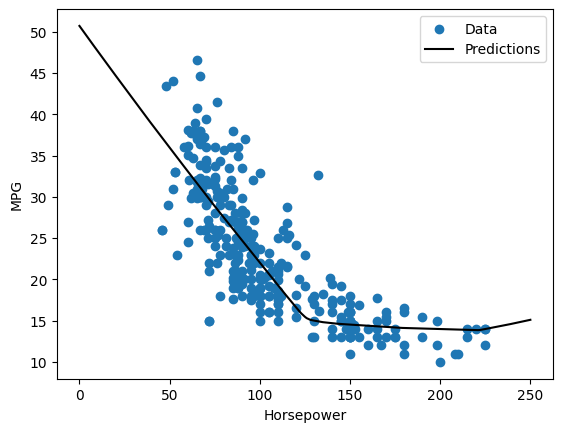

In [ ]:
# 테스트 결과 수집
test_results = {}
test_results['dnn_horsepower_model'] = dnn_horsepower_model.evaluate(test_X['Horsepower'], test_y)

# 테스트 결과 시각화
def plot_horsepower(x, y):
  plt.scatter(train_X['Horsepower'], train_y, label='Data')
  plt.plot(x, y, color='k', label='Predictions')
  plt.xlabel('Horsepower')
  plt.ylabel('MPG')
  plt.legend()

x = tf.linspace(0.0, 250, 251)
y = dnn_horsepower_model.predict(x)
plot_horsepower(x, y)

# DNN 및 다중 입력을 사용한 회귀

## (3) Build the model

In [ ]:
# 9개 입력변수에 대한 mean, variance 계산 => Z-score normalization (이하 normalization) 준비 
input_layer = tf.keras.layers.Normalization() 
input_layer.adapt(np.array(train_X))   

# 정의된 함수를 호출하여 DNN모델 빌드
dnn_model = build_and_compile_model(input_layer)

# 모델 구조 확인
dnn_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_1 (Normalizat  (None, 9)                19        
 ion)                                                            
                                                                 
 dense_3 (Dense)             (None, 64)                640       
                                                                 
 dense_4 (Dense)             (None, 64)                4160      
                                                                 
 dense_5 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4,884
Trainable params: 4,865
Non-trainable params: 19
_________________________________________________________________


- Non-trainable params은 신경을 안써도됨
- 평균, 정규화 같은 정보에 대한 파라미터임
- Trainable params는 dense 3, 4, 5만 더하면됨


## (4) Training

In [ ]:
%%time 
# 100 epoch에 대한 훈련을 실행하고 진행 과정 기록
history = dnn_model.fit(
    train_X,
    train_y,
    validation_split=0.2,
    epochs=100)

Epoch 1/100
8/8 [==============================] - 2s 38ms/step - loss: 22.5487 - val_loss: 22.5164
Epoch 2/100
8/8 [==============================] - 0s 6ms/step - loss: 21.6642 - val_loss: 21.5347
Epoch 3/100
8/8 [==============================] - 0s 7ms/step - loss: 20.6954 - val_loss: 20.3822
Epoch 4/100
8/8 [==============================] - 0s 6ms/step - loss: 19.5225 - val_loss: 18.9356
Epoch 5/100
8/8 [==============================] - 0s 6ms/step - loss: 18.0186 - val_loss: 17.1195
Epoch 6/100
8/8 [==============================] - 0s 8ms/step - loss: 16.2202 - val_loss: 15.2572
Epoch 7/100
8/8 [==============================] - 0s 9ms/step - loss: 14.3421 - val_loss: 13.4028
Epoch 8/100
8/8 [==============================] - 0s 7ms/step - loss: 12.3806 - val_loss: 11.1684
Epoch 9/100
8/8 [==============================] - 0s 8ms/step - loss: 10.1593 - val_loss: 8.6468
Epoch 10/100
8/8 [==============================] - 0s 8ms/step - loss: 7.5551 - val_loss: 6.3652
Epoch 11/10

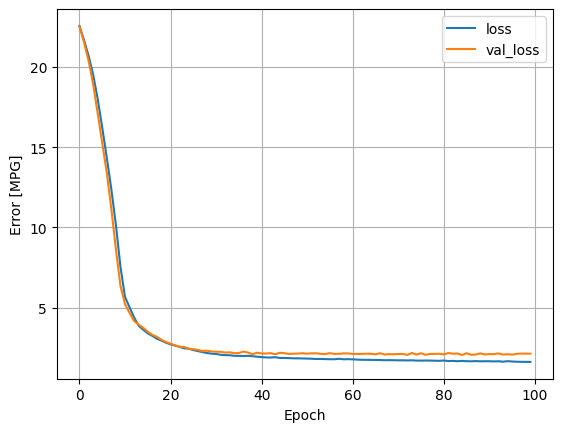

In [ ]:
# 훈련과정 시각화
plot_loss(history)

## (5) Evaluation

In [ ]:
# 테스트 결과 수집
test_results['dnn_model'] = dnn_model.evaluate(test_X, test_y)

3/3 [==============================] - 0s 5ms/step - loss: 1.6986


In [ ]:
# 기존 모델과의 비교
pd.DataFrame(test_results, index=['Mean absolute error [MPG]']).T

,Mean absolute error [MPG]
dnn_horsepower_model,2.95810
dnn_model,1.69856


3/3 [==============================] - 0s 3ms/step


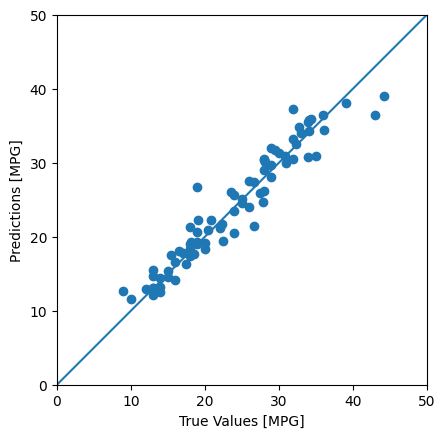

In [ ]:
# 실측값과 예측값에 대한 데이터 비교
# y=x 그래프 일수록 학습이 잘된 것임
# 훈련된 모델로 예측하기
test_predictions = dnn_model.predict(test_X).flatten()

# 예측 결과 시각화
a = plt.axes(aspect='equal')
plt.scatter(test_y, test_predictions)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
lims = [0, 50]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)